In [628]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Data Import and EDA

In [629]:
# importing the data

house=pd.read_csv("train.csv")

In [630]:
# Inspecting the Data

house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [631]:
house.shape


(1460, 81)

In [632]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [633]:
round(100*house.isnull().sum()/len(house.index),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [634]:
house = house.drop('Alley',axis=1)
house = house.drop('PoolQC',axis=1)
house = house.drop('Fence',axis=1)
house = house.drop('MiscFeature',axis=1)
house.shape


(1460, 77)

In [635]:
round(100*house.isnull().sum()/len(house.index),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
                 ...  
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinis

In [636]:
house = house.drop('FireplaceQu',axis=1)
house.shape

(1460, 76)

In [637]:
round(100*house.isnull().sum()/len(house.index),2)


Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
                 ...  
BsmtFullBath      0.00
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
GarageType        5.55
GarageYrBlt       5.55
GarageFinis

In [638]:
house = house.replace( np.nan,0)
house['BsmtQual'].loc[house['BsmtQual'].isnull()] = 0
house['BsmtCond'].loc[house['BsmtCond'].isnull()] = 0
house['BsmtExposure'].loc[house['BsmtExposure'].isnull()] = 0
house['BsmtFinType1'].loc[house['BsmtFinType1'].isnull()] = 0
house['BsmtFinType2'].loc[house['BsmtFinType2'].isnull()] = 0
house['HeatingQC'].loc[house['HeatingQC'].isnull()] = 0
house['GarageFinish'].loc[house['GarageFinish'].isnull()] = 0
house['GarageType'].loc[house['GarageType'].isnull()] = 0
house['GarageYrBlt'].loc[house['GarageYrBlt'].isnull()] = 0
house['GarageQual'].loc[house['GarageQual'].isnull()] = 0
house['GarageCond'].loc[house['GarageCond'].isnull()] = 0
house['MasVnrType'].loc[house['MasVnrType'].isnull()] = 0


In [639]:
# correlation matrix
cor = house.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.019761,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.215023,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.019761,-0.215023,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.105010,0.076670,...,-0.016780,0.069605,0.027366,0.023499,0.022969,0.114106,-0.059606,0.018942,-0.012094,0.209624
LotArea,-0.033226,-0.139781,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.176561,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053457,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.036853,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.078686,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.105010,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.076670,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


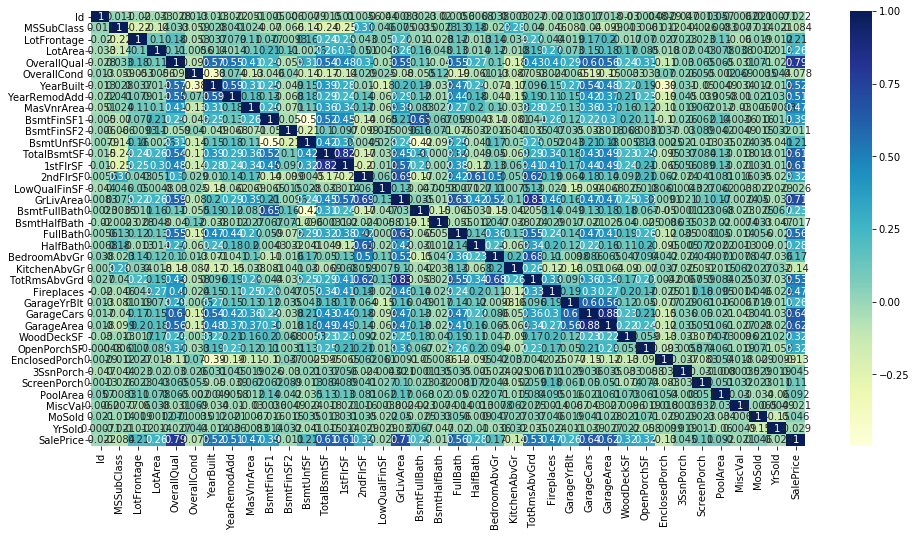

In [640]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

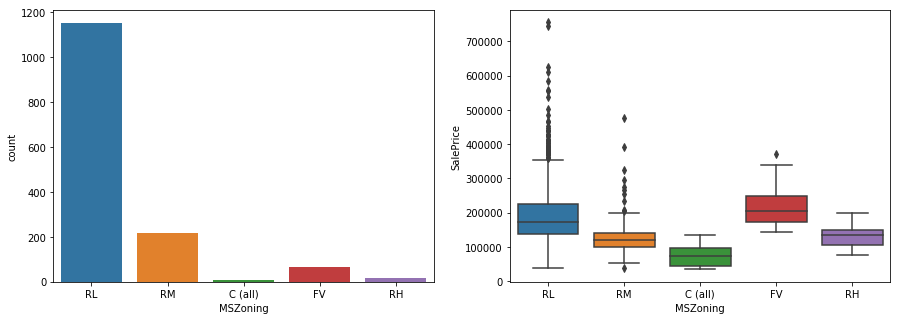

In [641]:
# MSZoning - Identifies the general zoning classification of the sale.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(house.MSZoning)
plt.subplot(1,2,2)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = house)
#Each Category has some impact on price
# Most houses are Residential Low Density and 15% are Residential High Density


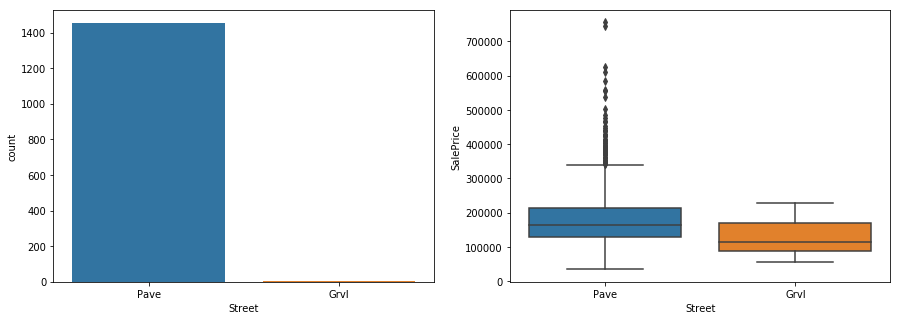

In [642]:
# Street: Type of road access to property

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(house.Street)
plt.subplot(1,2,2)
sns.boxplot(x = 'Street', y = 'SalePrice', data = house)
#Each Category has some impact on price
# most of the road is pave and only 0.4% is Gravel. 

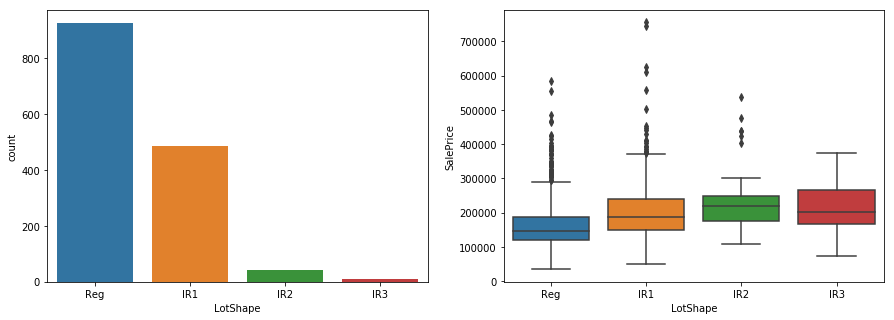

In [643]:

#LotShape: General shape of property

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(house.LotShape)
plt.subplot(1,2,2)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = house)
#Each Category has some impact on price

# Most property (60%+) is regular shaped, around 30%+ is slightly irregular

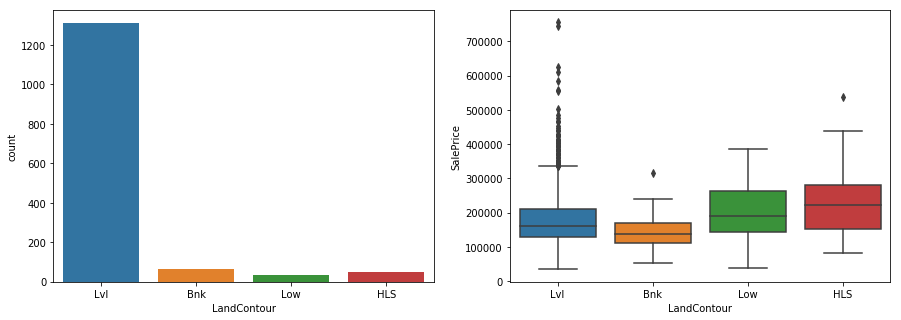

In [644]:

#LandContour: Flatness of the property


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(house.LandContour)
plt.subplot(1,2,2)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = house)
#Each Category has some impact on price

# Most property (85%+) is level and balance is other than level

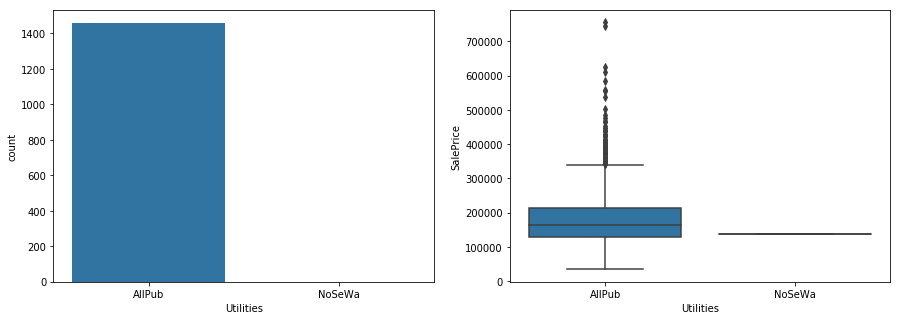

In [645]:

#Utilities: Type of utilities available


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(house.Utilities)
plt.subplot(1,2,2)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = house)
#Each Category has some impact on price

# Almost all property have all utilities

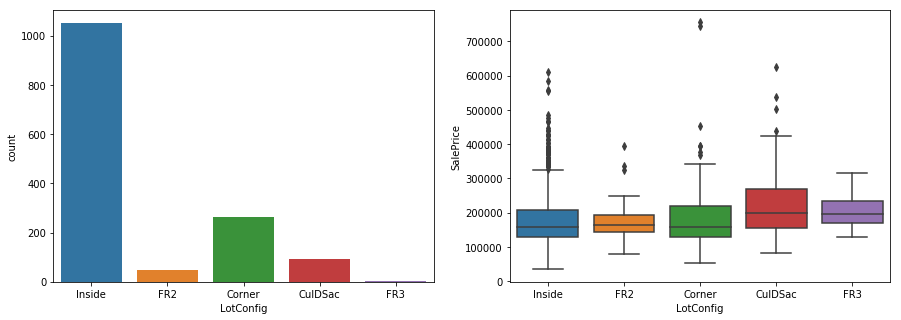

In [646]:

#LotConfig: Lot configuration


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(house.LotConfig)
plt.subplot(1,2,2)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = house)
#Each Category has some impact on price

# 68% property have inside lot, 19% have corner lot

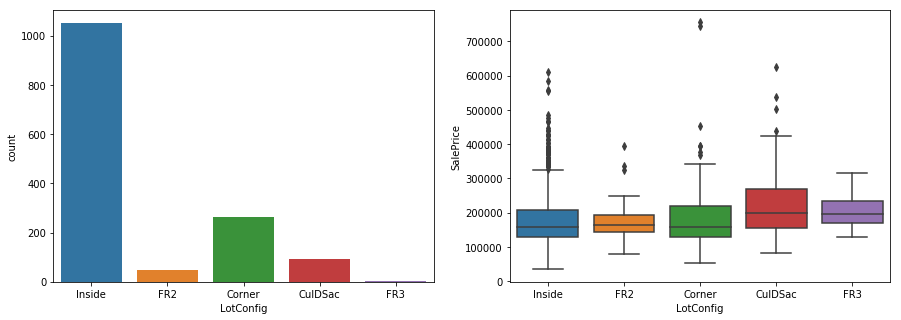

In [647]:

#LotConfig: Lot configuration


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(house.LotConfig)
plt.subplot(1,2,2)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = house)
#Each Category has some impact on price

# 68% property have inside lot, 19% have corner lot

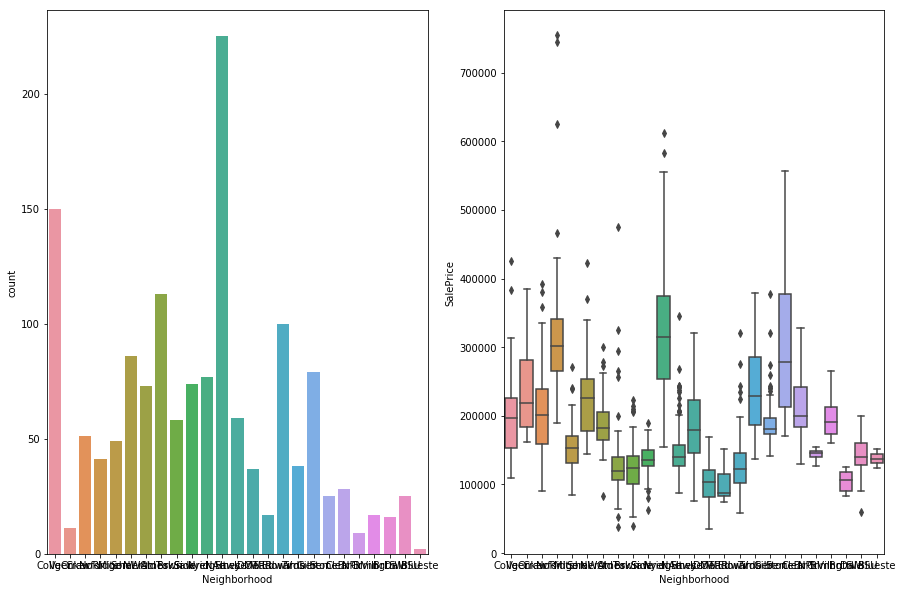

In [648]:

#Neighbourhood


plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(house.Neighborhood)
plt.subplot(1,2,2)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = house)
#Each Category has some impact on price

# Names, CollgCr, OldTown, Edwards and Others are among the top

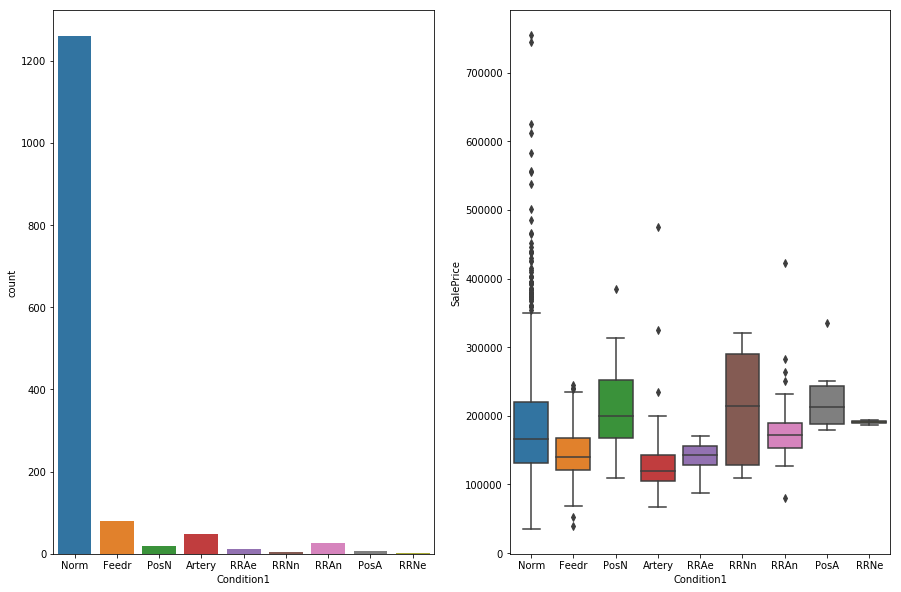

In [649]:

#Condition1: Proximity to various conditions



plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(house.Condition1)
plt.subplot(1,2,2)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = house)
#Each Category has some impact on price
# most of tthem are Normal and under 10% each is Feedr and Artery

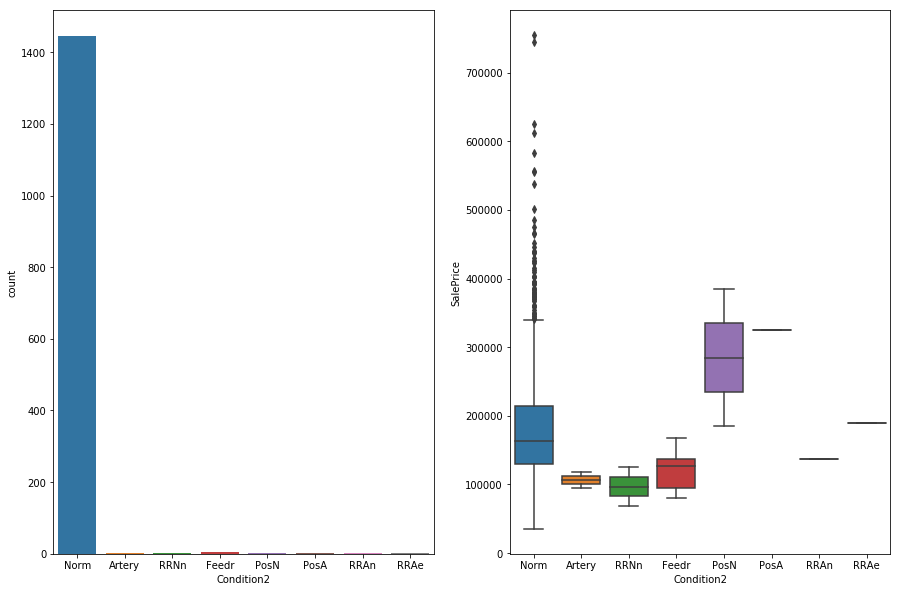

In [650]:

#Condition2: Proximity to various conditions (if more than one is present)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(house.Condition2)
plt.subplot(1,2,2)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = house)
#Each Category has some impact on price

# Most of them are normal

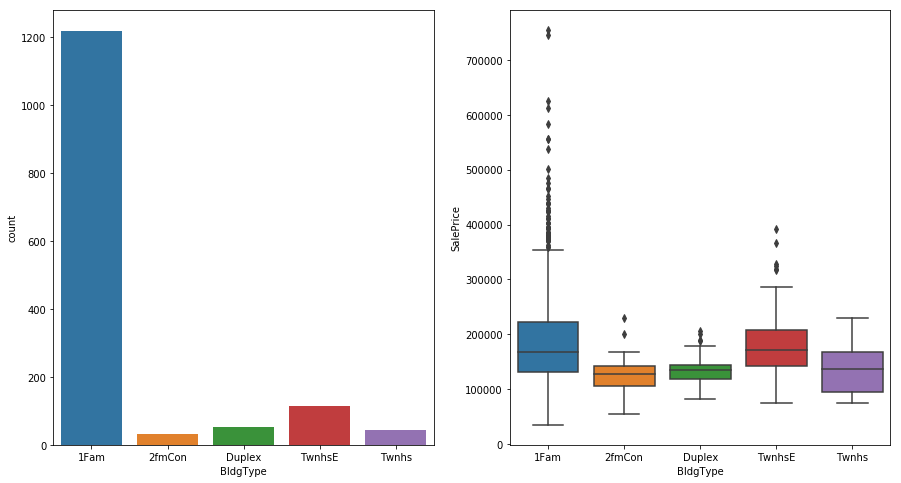

In [651]:

#BldgType: Type of dwelling


plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(house.BldgType)
plt.subplot(1,2,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = house)
#Each Category has some impact on price


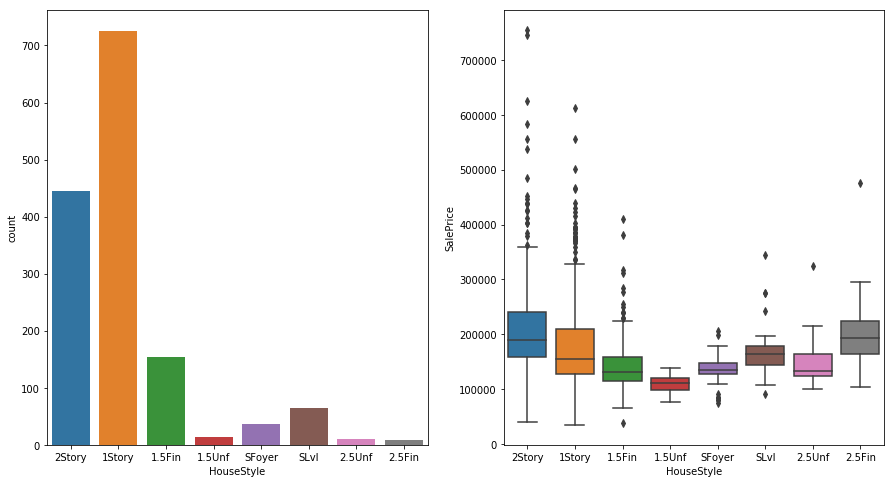

In [652]:

#HouseStyle: Style of dwelling

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(house.HouseStyle)
plt.subplot(1,2,2)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = house)
#Each Category has some impact on price

# 1 Storey, 2 Storey and 1.5 make up most

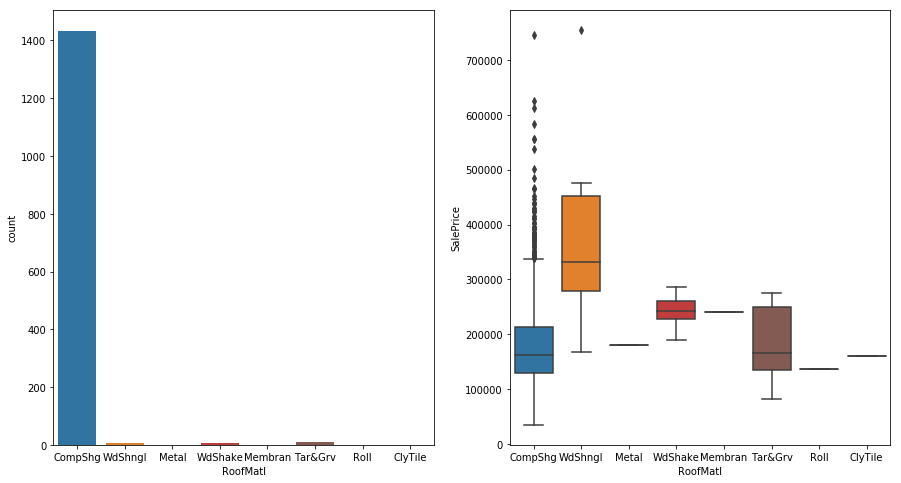

In [653]:

#RoofMatl: Roof material


plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(house.RoofMatl)
plt.subplot(1,2,2)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = house)
#Each Category has some impact on price


# Most of the roof is Standard (Composite) Shingle

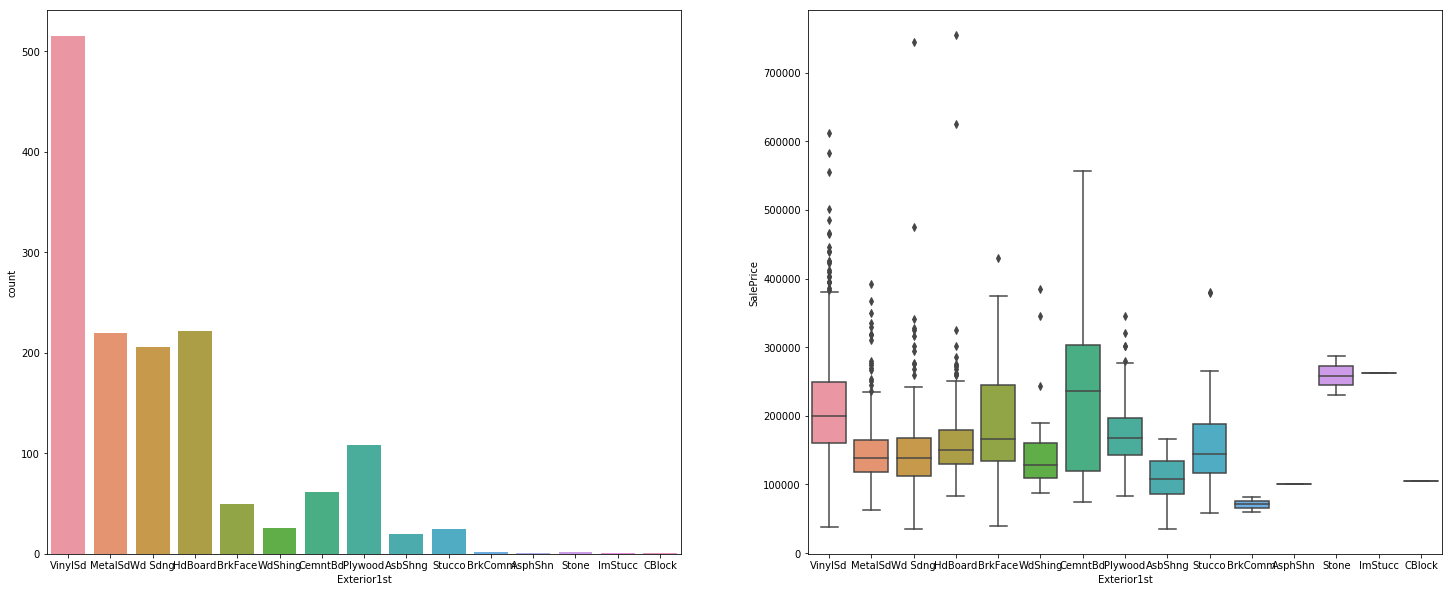

In [654]:

#Exterior1st: Exterior covering on house



plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.countplot(house.Exterior1st)
plt.subplot(1,2,2)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = house)
#Each Category has some impact on price

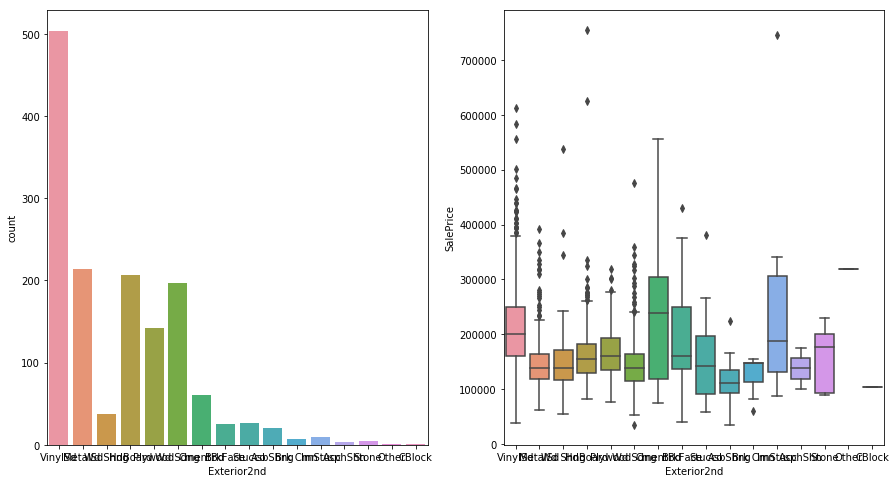

In [655]:
#Exterior2nd: Exterior covering on house (if more than one material)


plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(house.Exterior2nd)
plt.subplot(1,2,2)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = house)
#Each Category has some impact on price

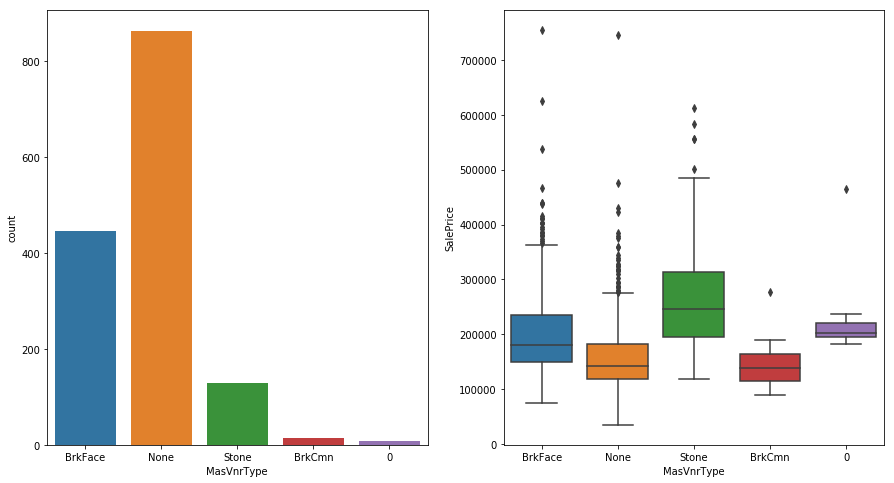

In [656]:
#MasVnrType: Masonry veneer type

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(house.MasVnrType)
plt.subplot(1,2,2)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = house)
#Each Category has some impact on price
# None is maximum, (~60%) and brickface is next large group

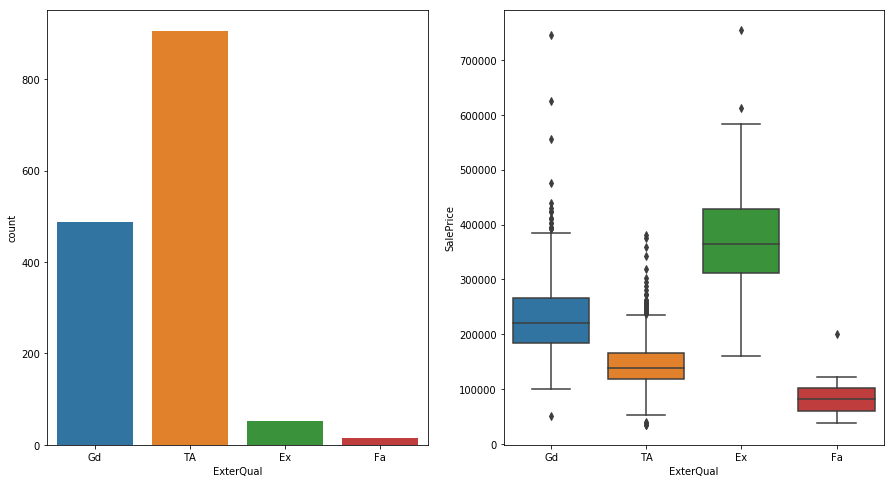

In [657]:
#ExterQual: Evaluates the quality of the material on the exterior 


plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(house.ExterQual)
plt.subplot(1,2,2)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = house)
#Each Category has some impact on price

# Most prperties are Average and few are in Good. Others are very less

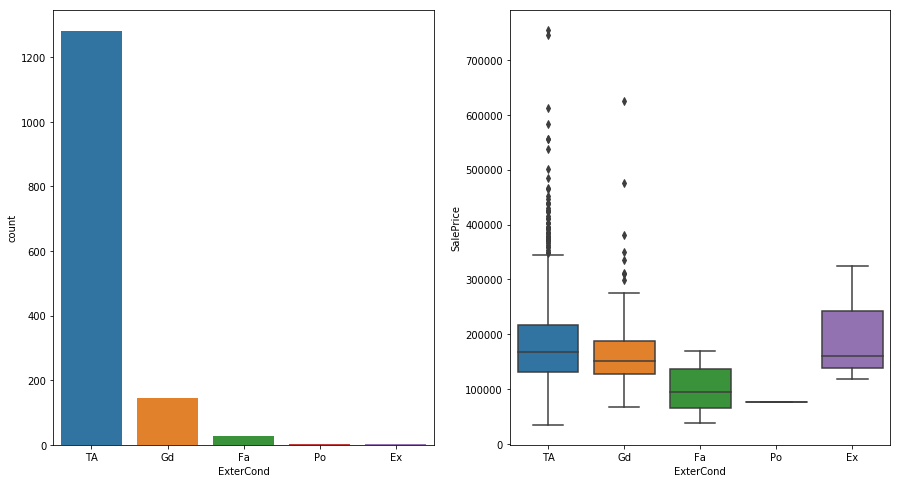

In [658]:
#ExterCond: Evaluates the present condition of the material on the exterior

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(house.ExterCond)
plt.subplot(1,2,2)
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = house)
#Each Category has some impact on price



# Most prperties are Average and very few are in Good and Others 

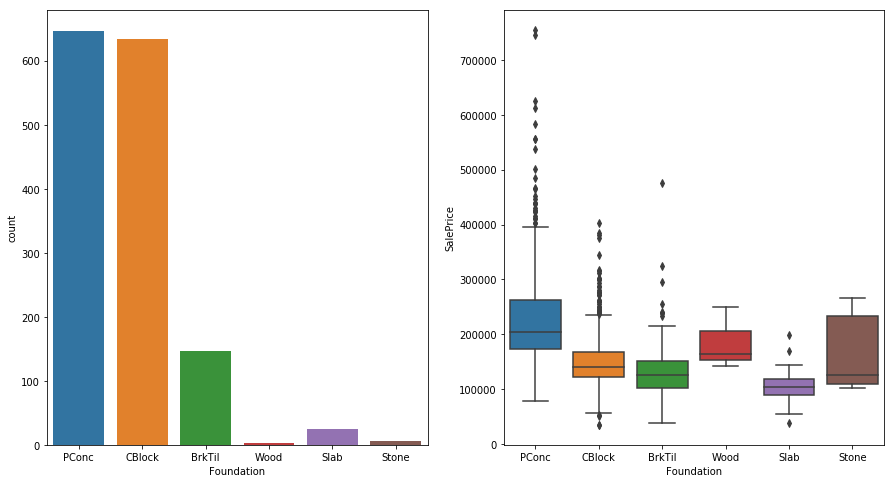

In [659]:
#Foundation: Type of foundation


plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(house.Foundation)
plt.subplot(1,2,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = house)
#Each Category has some impact on price

# Poured Contrete and Cinder Block make up most type of foundations

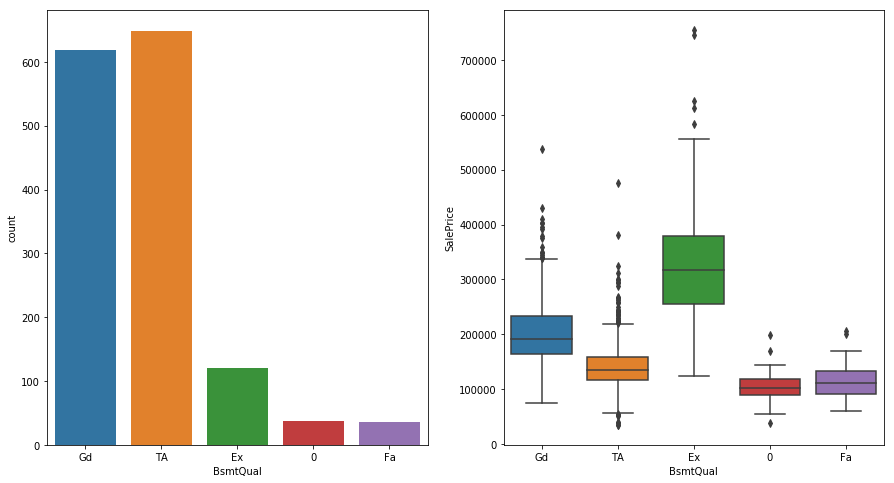

In [660]:
#BsmtQual: Evaluates the height of the basement


plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(house.BsmtQual)
plt.subplot(1,2,2)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = house)
#Each Category has some impact on price

# Good and Typical make up most of the Basement Type

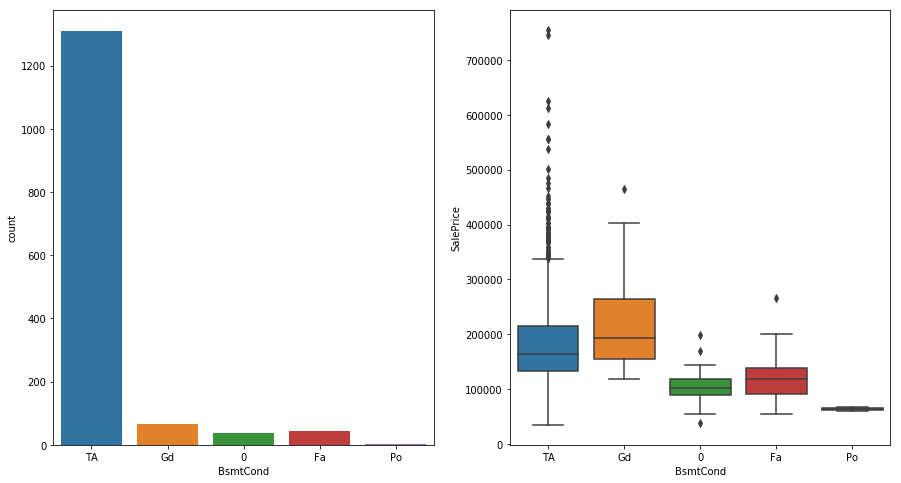

In [661]:
#BsmtCond: Evaluates the general condition of the basement

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(house.BsmtCond)
plt.subplot(1,2,2)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = house)
#Each Category has minimum impact on price

# Most Basement condition is Average (90%)


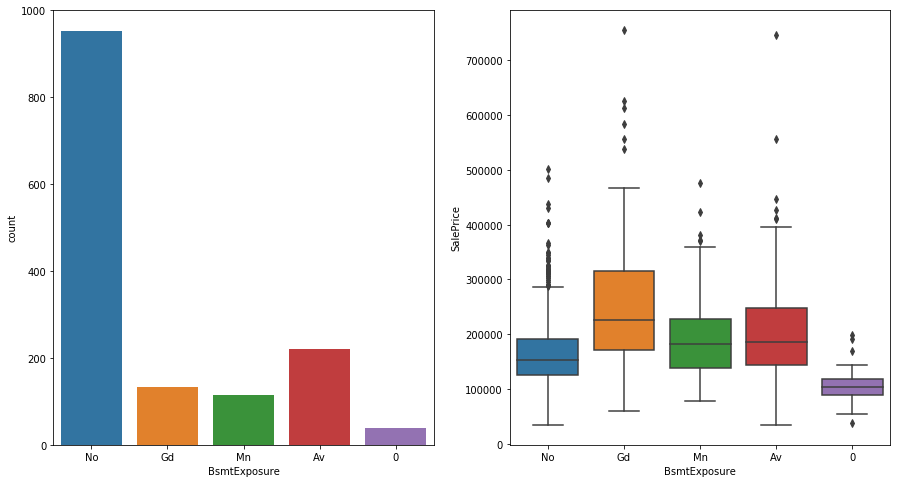

In [662]:
#BsmtExposure: Refers to walkout or garden level walls


plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(house.BsmtExposure)
plt.subplot(1,2,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = house)
#Each Category has some impact on price


# No basement have exposure to walk out area

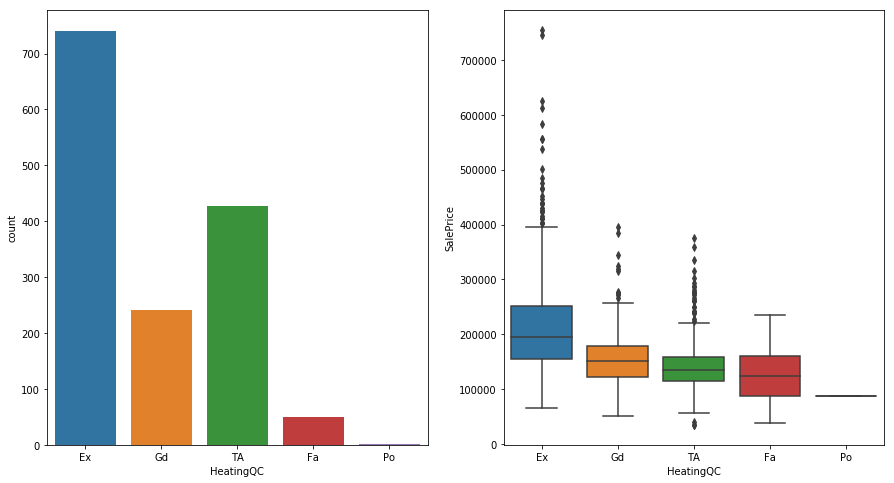

In [663]:
#HeatingQC - Heating quality and condition



plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(house.HeatingQC)
plt.subplot(1,2,2)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = house)
#Each Category has some impact on price

# Most properties have Heating Quality and Condition

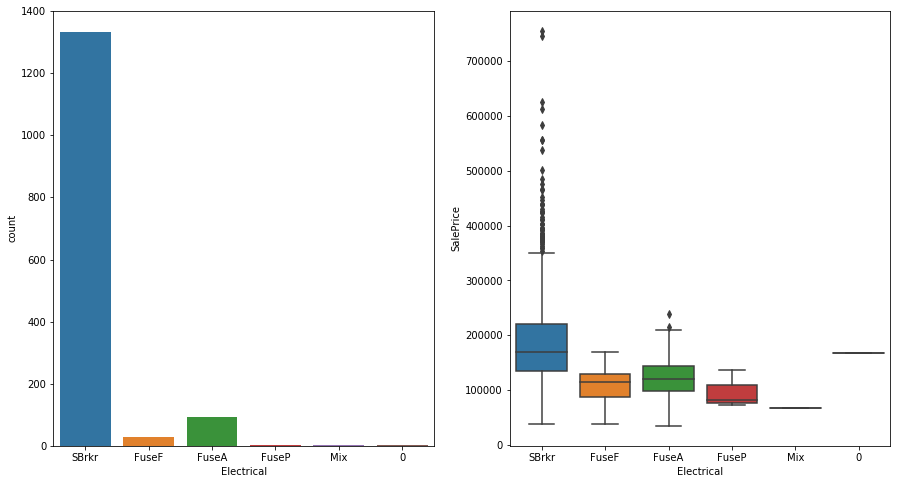

In [664]:
#Electrical: Electrical system


plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(house.Electrical)
plt.subplot(1,2,2)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = house)
#Each Category has some impact on price


# Most properties have Standard Circuit Breakers & Romex

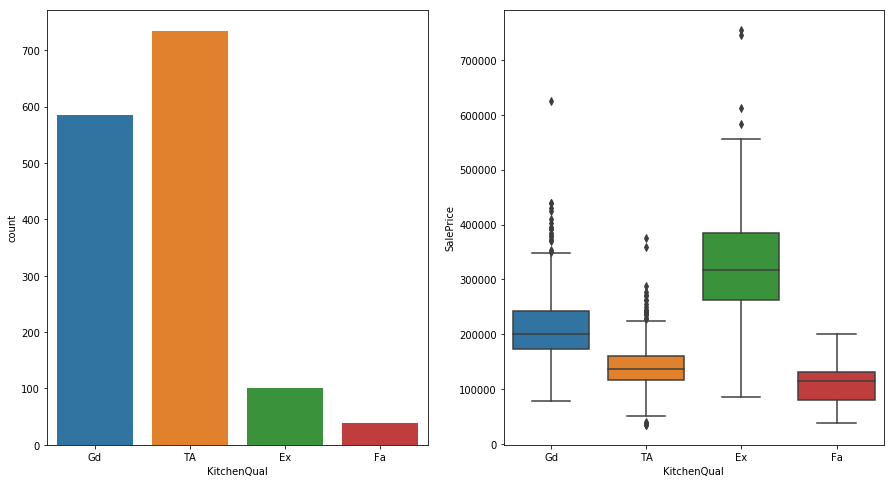

In [665]:
#KitchenQual: Kitchen quality


plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(house.KitchenQual)
plt.subplot(1,2,2)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = house)
#Each Category has some impact on price

# Most properties have Typical Kitched and about 40% Good

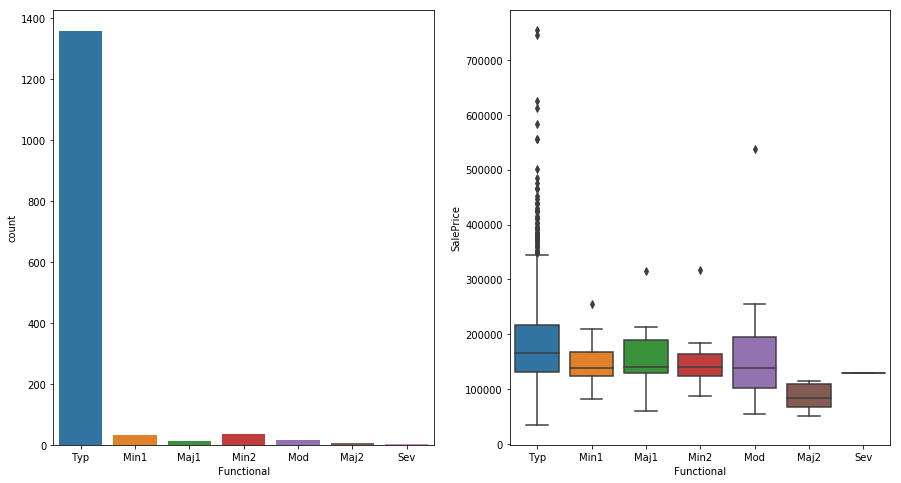

In [666]:
#Functional: Home functionality (Assume typical unless deductions are warranted)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(house.Functional)
plt.subplot(1,2,2)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = house)
#Each Category has some impact on price

# Most properties have Typical Functionality

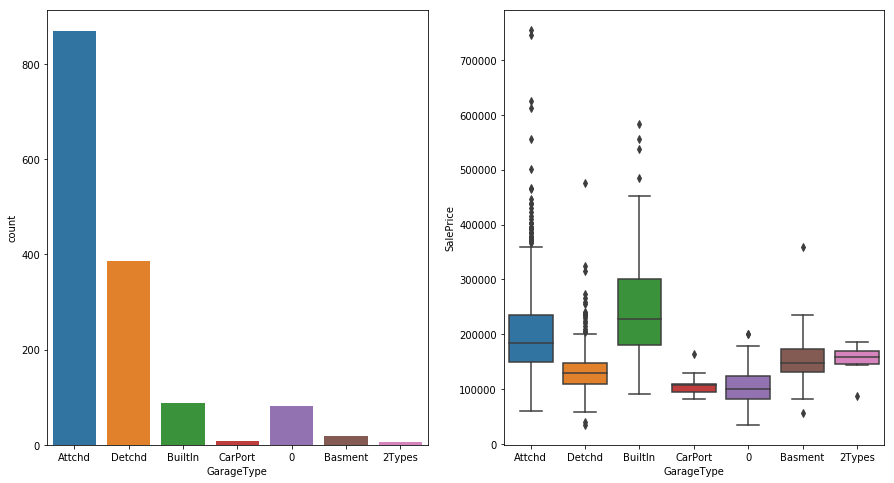

In [667]:
#GarageType: Garage location



plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(house.GarageType)
plt.subplot(1,2,2)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = house)
#Each Category has some impact on price

# Around 55% of properties have  Garage Attached to home

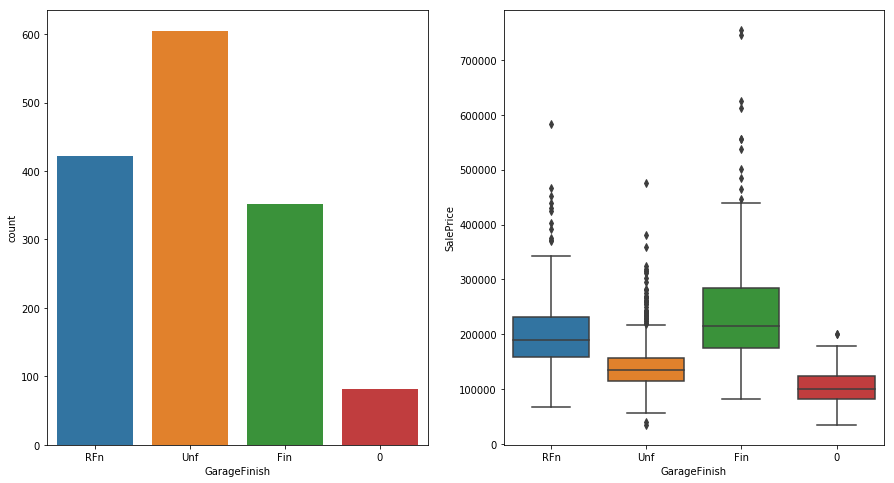

In [668]:
#GarageFinish: Interior finish of the garage


plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(house.GarageFinish)
plt.subplot(1,2,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = house)
#Each Category has some impact on price

# Most propoerties have unfinished Garage but Finished and Rough Finished are also high

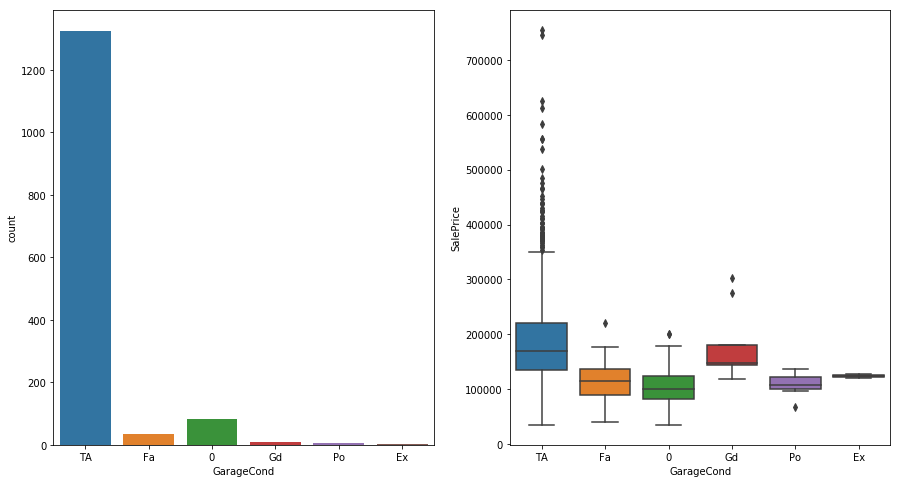

In [669]:
#GarageCond: Garage condition



plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(house.GarageCond)
plt.subplot(1,2,2)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = house)
#Each Category has some impact on price


# Most propoerties Garage with Typical/ Avg Condition

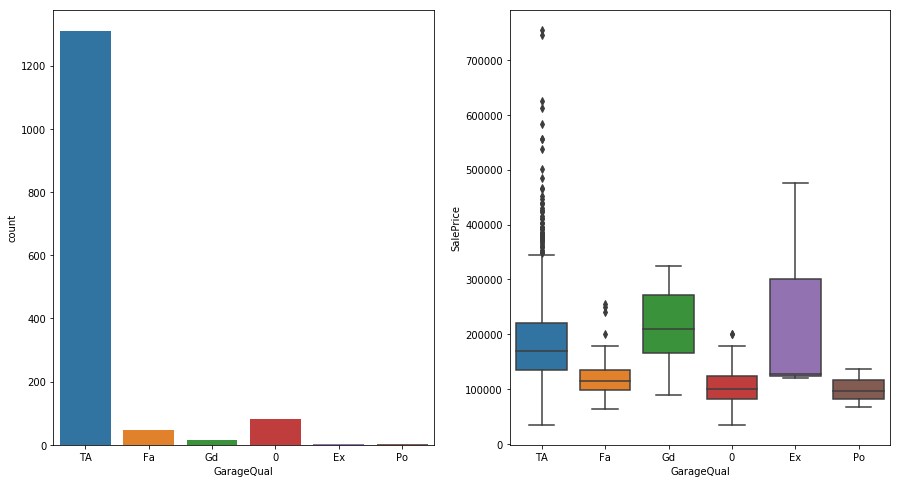

In [670]:
#GarageQual: Garage quality



plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(house.GarageQual)
plt.subplot(1,2,2)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = house)
#Each Category has some impact on price


#  Most propoerties Garage with Typical/ Avg Quality

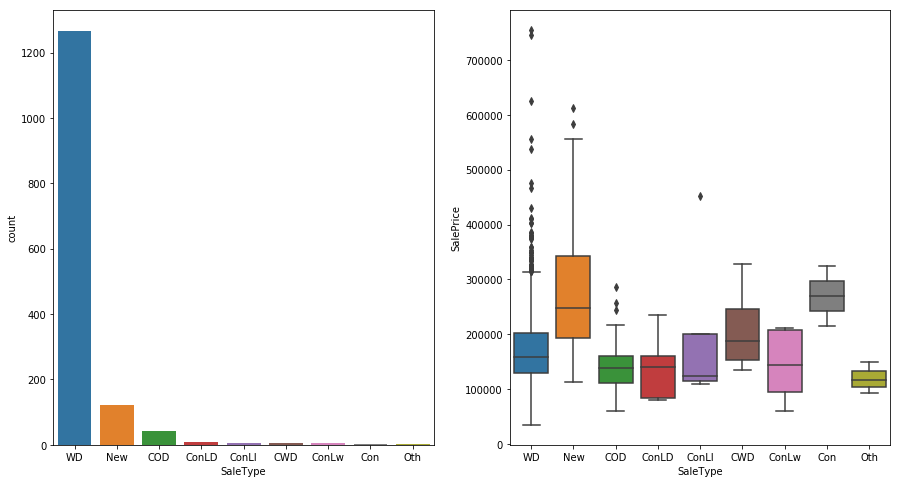

In [671]:
# SaleType: Type of sale

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(house.SaleType)
plt.subplot(1,2,2)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = house)
#Each Category has some impact on price

# most properties have warranty deed as conventional

In [672]:
# Creating a dummy variable for the variable 'MSZoning' and dropping the first one.
dum1 = pd.get_dummies(house['MSZoning'],prefix='MSZoning',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum1],axis=1)

# Creating a dummy variable for the variable 'LotShape' and dropping the first one.
dum2 = pd.get_dummies(house['LotShape'],prefix='LotShape',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum2],axis=1)

# Creating a dummy variable for the variable 'LandContour' and dropping the first one.
dum3 = pd.get_dummies(house['LandContour'],prefix='LandContour',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum3],axis=1)

# Creating a dummy variable for the variable 'Utilities' and dropping the first one.
dum4 = pd.get_dummies(house['Utilities'],prefix='Utilities',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum4],axis=1)

# Creating a dummy variable for the variable 'LotConfig' and dropping the first one.
dum5 = pd.get_dummies(house['LotConfig'],prefix='LotConfig',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum5],axis=1)

# Creating a dummy variable for the variable 'LandSlope' and dropping the first one.
dum6 = pd.get_dummies(house['LandSlope'],prefix='LandSlope',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum6],axis=1)
#Neighborhood

# Creating a dummy variable for the variable 'Neighborhood' and dropping the first one.
dum7 = pd.get_dummies(house['Neighborhood'],prefix='Neighborhood',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum7],axis=1)

# Creating a dummy variable for the variable 'Condition1' and dropping the first one.
dum8 = pd.get_dummies(house['Condition1'],prefix='Condition1',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum8],axis=1)

#Creating a dummy variable for the variable 'Condition2and dropping the first one.
dum9= pd.get_dummies(house['Condition2'],prefix='Condition2',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum9],axis=1)


#Creating a dummy variable for the variable 'BldgType'dropping the first one.
dum10 =pd.get_dummies(house['BldgType'],prefix='BldgType',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum10],axis=1)
                   



In [673]:
#Dropping Columns converted to dummy

house = house.drop(['MSZoning','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType'],axis=1)



In [674]:
house.shape

(1460, 126)

In [675]:
house.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,1,60,65.0,8450,Pave,2Story,7,5,2003,2003,...,1,0,0,0,0,0,0,0,0,0
1,2,20,80.0,9600,Pave,1Story,6,8,1976,1976,...,1,0,0,0,0,0,0,0,0,0
2,3,60,68.0,11250,Pave,2Story,7,5,2001,2002,...,1,0,0,0,0,0,0,0,0,0
3,4,70,60.0,9550,Pave,2Story,7,5,1915,1970,...,1,0,0,0,0,0,0,0,0,0
4,5,60,84.0,14260,Pave,2Story,8,5,2000,2000,...,1,0,0,0,0,0,0,0,0,0


In [676]:
# Creating a dummy variable for the variable 'HouseStyle' and dropping the first one.
dum11 = pd.get_dummies(house['HouseStyle'],prefix='HouseStyle',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum11],axis=1)

# Creating a dummy variable for the variable 'HouseStyle' and dropping the first one.
dum12 = pd.get_dummies(house['RoofStyle'],prefix='RoofStyle',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum12],axis=1)

# Creating a dummy variable for the variable 'RoofMatl' and dropping the first one.
dum13 = pd.get_dummies(house['RoofMatl'],prefix='RoofMatl',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum13],axis=1)

# Creating a dummy variable for the variable 'MasVnrType' and dropping the first one.
dum14 = pd.get_dummies(house['MasVnrType'],prefix='MasVnrType',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum14],axis=1)


# Creating a dummy variable for the variable 'Foundation' and dropping the first one.
dum15 = pd.get_dummies(house['Foundation'],prefix='Foundation',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum15],axis=1)


# Creating a dummy variable for the variable 'Heating' and dropping the first one.
dum16 = pd.get_dummies(house['Heating'],prefix='Heating',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum16],axis=1)


# Creating a dummy variable for the variable 'HeatingQC' and dropping the first one.
dum17 = pd.get_dummies(house['HeatingQC'],prefix='HeatingQC',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum17],axis=1)

house['CentralAir'] = house['CentralAir'].map({'Yes': 1, 'No': 0})
house['Street'] = house['Street'].map({'Pave': 1, 'Grvl': 0})

# Creating a dummy variable for the variable 'Electrical' and dropping the first one.
dum18 = pd.get_dummies(house['Electrical'],prefix='Electrical',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum18],axis=1)

# Creating a dummy variable for the variable 'KitchenQual' and dropping the first one.
dum19 = pd.get_dummies(house['KitchenQual'],prefix='KitchenQual',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum19],axis=1)

# Creating a dummy variable for the variable 'Functional' and dropping the first one.
dum20 = pd.get_dummies(house['Functional'],prefix='Functional',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum20],axis=1)



In [677]:
#Dropping Columns converted to dummy

house = house.drop(['HouseStyle','RoofStyle','RoofMatl','MasVnrType','Foundation','Heating','HeatingQC','Electrical','KitchenQual','Functional'],axis=1)



In [678]:
house.shape

(1460, 167)

In [679]:
house.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ
0,1,60,65.0,8450,1,7,5,2003,2003,VinylSd,...,1,0,1,0,0,0,0,0,0,1
1,2,20,80.0,9600,1,6,8,1976,1976,MetalSd,...,1,0,0,1,0,0,0,0,0,1
2,3,60,68.0,11250,1,7,5,2001,2002,VinylSd,...,1,0,1,0,0,0,0,0,0,1
3,4,70,60.0,9550,1,7,5,1915,1970,Wd Sdng,...,1,0,1,0,0,0,0,0,0,1
4,5,60,84.0,14260,1,8,5,2000,2000,VinylSd,...,1,0,1,0,0,0,0,0,0,1


In [680]:
round(100*house.isnull().sum()/len(house.index),2)

Id                     0.0
MSSubClass             0.0
LotFrontage            0.0
LotArea                0.0
Street                 0.0
OverallQual            0.0
OverallCond            0.0
YearBuilt              0.0
YearRemodAdd           0.0
Exterior1st            0.0
Exterior2nd            0.0
MasVnrArea             0.0
ExterQual              0.0
ExterCond              0.0
BsmtQual               0.0
BsmtCond               0.0
BsmtExposure           0.0
BsmtFinType1           0.0
BsmtFinSF1             0.0
BsmtFinType2           0.0
BsmtFinSF2             0.0
BsmtUnfSF              0.0
TotalBsmtSF            0.0
CentralAir           100.0
1stFlrSF               0.0
2ndFlrSF               0.0
LowQualFinSF           0.0
GrLivArea              0.0
BsmtFullBath           0.0
BsmtHalfBath           0.0
                     ...  
MasVnrType_None        0.0
MasVnrType_Stone       0.0
Foundation_CBlock      0.0
Foundation_PConc       0.0
Foundation_Slab        0.0
Foundation_Stone       0.0
F

In [681]:
house = house.drop('CentralAir',axis=1)
house.shape

(1460, 166)

In [682]:
round(100*house.isnull().sum()/len(house.index),2)

Id                   0.0
MSSubClass           0.0
LotFrontage          0.0
LotArea              0.0
Street               0.0
OverallQual          0.0
OverallCond          0.0
YearBuilt            0.0
YearRemodAdd         0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrArea           0.0
ExterQual            0.0
ExterCond            0.0
BsmtQual             0.0
BsmtCond             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtFinType2         0.0
BsmtFinSF2           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
1stFlrSF             0.0
2ndFlrSF             0.0
LowQualFinSF         0.0
GrLivArea            0.0
BsmtFullBath         0.0
BsmtHalfBath         0.0
FullBath             0.0
                    ... 
MasVnrType_None      0.0
MasVnrType_Stone     0.0
Foundation_CBlock    0.0
Foundation_PConc     0.0
Foundation_Slab      0.0
Foundation_Stone     0.0
Foundation_Wood      0.0
Heating_GasA         0.0
Heating_GasW         0.0


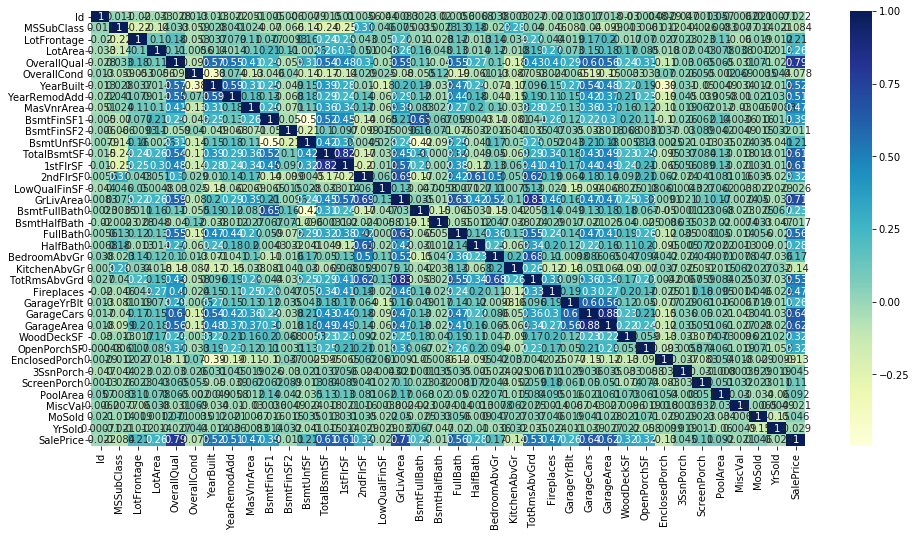

In [683]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

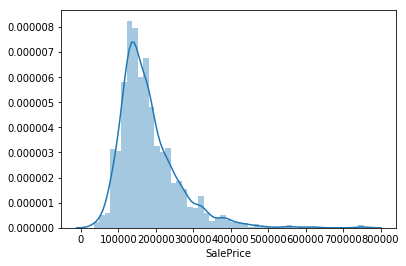

In [684]:
#Target variable: sale price of house
sns.distplot(house['SalePrice'])
plt.show()

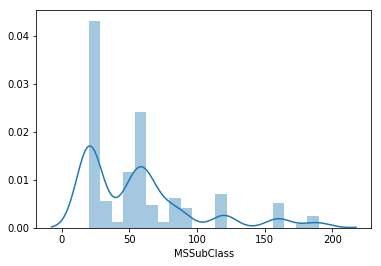

In [685]:
# MSSubClass --> Identifies the type of dwelling involved in the sale.
sns.distplot(house['MSSubClass'])
plt.show()
#Most houses are "1-STORY 1946 & NEWER ALL STYLES". but there a few more too


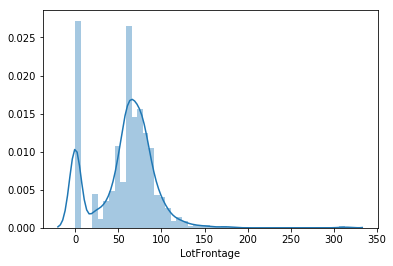

In [686]:
# LotFrontage: Linear feet of street connected to property
sns.distplot(house['LotFrontage'])
plt.show()
#There are number of cases 25% where LOT frontage is Zero

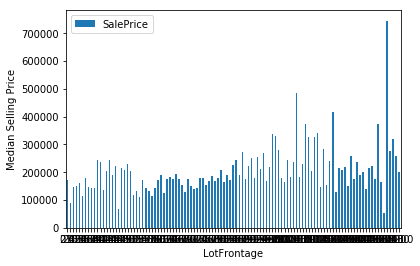

In [687]:
# visualising Lot Frontage in relation to sales price
LotFrontage_pivot = house.pivot_table(index='LotFrontage', values='SalePrice', aggfunc=np.median)
LotFrontage_pivot.plot(kind='bar')
plt.xlabel('LotFrontage')
plt.ylabel('Median Selling Price')
plt.xticks(rotation=0)
plt.show()

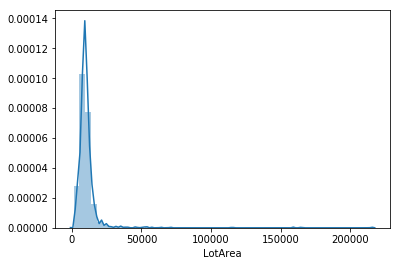

In [688]:
# LotArea: Lot size in square feet
sns.distplot(house['LotArea'])
plt.show()
#normally distributed

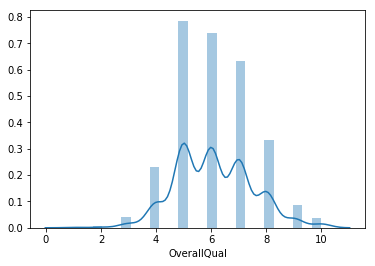

In [689]:
# OverallQual: Rates the overall material and finish of the house
sns.distplot(house['OverallQual'])
plt.show()
#Seems to have high correlation with price

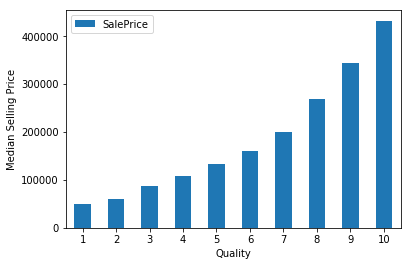

In [690]:
# visualising Quality in relation to sales price
quality_pivot = house.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar')
plt.xlabel('Quality')
plt.ylabel('Median Selling Price')
plt.xticks(rotation=0)
plt.show()

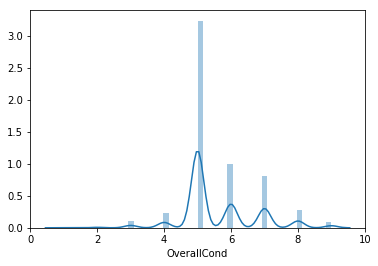

In [691]:
# OverallCond: Rates the overall condition of the house
sns.distplot(house['OverallCond'])
plt.show()
#Seems to have high correlation with price

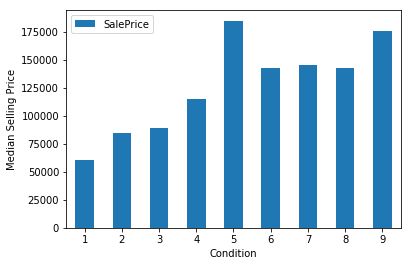

In [692]:
# visualising Condition in relation to sales price
condition_pivot = house.pivot_table(index='OverallCond', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar')
plt.xlabel('Condition')
plt.ylabel('Median Selling Price')
plt.xticks(rotation=0)
plt.show()

In [693]:
#Binning of the Year built variable
#Creating bins to define the year periods - 1872-1925, 1925-1950,1950-1975, 1976-1990, 1991-2000,2001-2010
bins=[1872,1925,1950,1976,1991,2001,2010]
slot_names=['1872-1925','1925-1950','1950-1975','1976-1990','1991-2000','2001-2010']
house['YearBuilt']=pd.cut(house['YearBuilt'],bins,labels=slot_names,include_lowest=True)


In [694]:
#Binning of the YearRemodAdd variable
#Creating bins to define the year periods - 1872-1925, 1925-1950,1950-1975, 1976-1990, 1991-2000,2001-2010
bins=[1872,1950,1976,1991,2001,2010]
slot_names=['1872-1950','1950-1975','1976-1990','1991-2000','2001-2010']
house['YearRemodAdd']=pd.cut(house['YearRemodAdd'],bins,labels=slot_names,include_lowest=True)

In [695]:
#Converting the binned year columns as object datatype
house['YearBuilt']=house['YearBuilt'].values.astype(np.object)
house['YearRemodAdd']=house['YearRemodAdd'].values.astype(np.object)

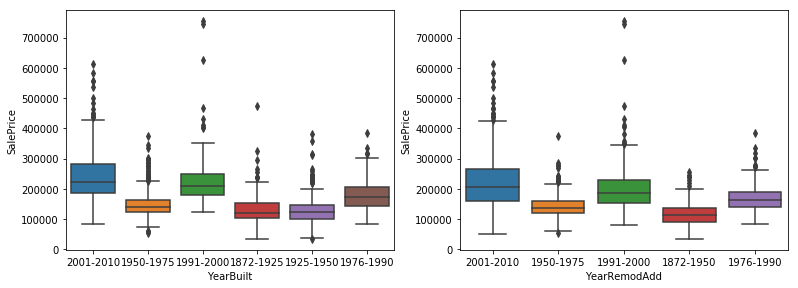

In [696]:
#Plotting the categorical variables related toYear Built and Year Remodified to find which ones have correlation and can be dropped
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = house)
plt.subplot(3,3,2)
sns.boxplot(x = 'YearRemodAdd', y = 'SalePrice', data = house)

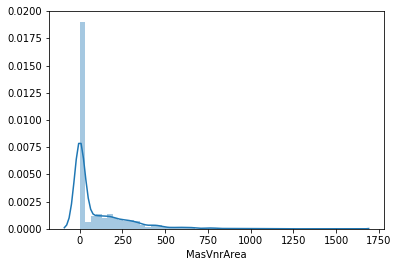

In [697]:
# BsmtFinSF1: Type 1 finished square feet
sns.distplot(house['MasVnrArea'])
plt.show()
#Seems to have high correlation with price

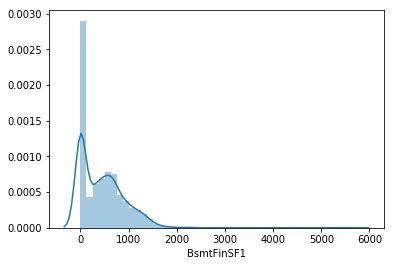

In [698]:
# BsmtFinSF2: Type 2 finished square feet
sns.distplot(house['BsmtFinSF1'])
plt.show()
#Seems to have high correlation with price

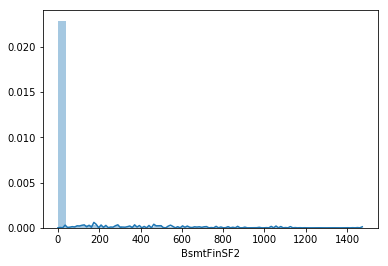

In [699]:
# MasVnrArea: Masonry veneer area in square feet
sns.distplot(house['BsmtFinSF2'])
plt.show()
#Seems to have high correlation with price

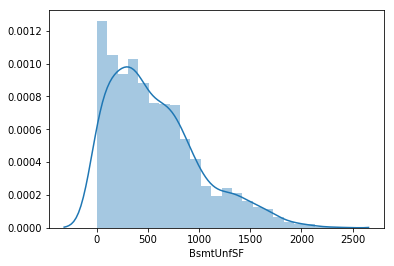

In [700]:
# BsmtUnfSF: Unfinished square feet of basement area
sns.distplot(house['BsmtUnfSF'])
plt.show()
#Seems to have high correlation with price

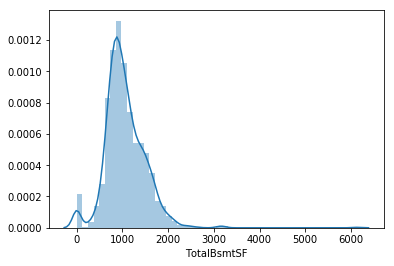

In [701]:
# TotalBsmtSF: Total square feet of basement area
sns.distplot(house['TotalBsmtSF'])
plt.show()
#Seems to have high correlation with price

<Figure size 1440x720 with 0 Axes>

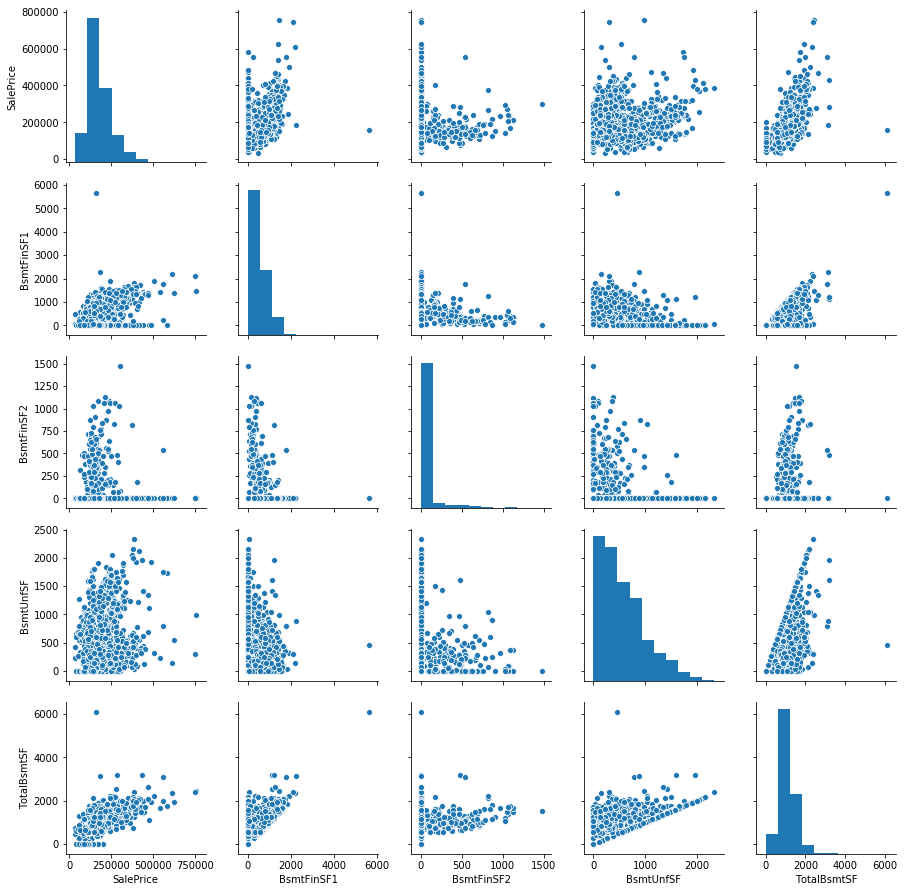

In [702]:
# pairwise scatter plot to explore Basement attributes

plt.figure(figsize=(20, 10))
sns.pairplot(house[['SalePrice','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']])
plt.show()

In [703]:
# pairwise scatter plot to explore Basement attributes

house[['SalePrice','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].corr()



,SalePrice,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
SalePrice,1.000000,0.386420,-0.011378,0.214479,0.613581
BsmtFinSF1,0.386420,1.000000,-0.050117,-0.495251,0.522396
BsmtFinSF2,-0.011378,-0.050117,1.000000,-0.209294,0.104810
BsmtUnfSF,0.214479,-0.495251,-0.209294,1.000000,0.415360
TotalBsmtSF,0.613581,0.522396,0.104810,0.415360,1.000000


In [704]:
# There seeems to be high correlation between BsmtFinSF1, BsmtFinSF2,TotalBsmtSF and BsmtUnfSF. They can be explained by TotalBsmtSF
# hence dropping them

house=house.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'],axis=1)



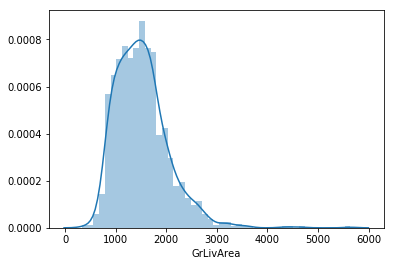

In [705]:
#GrLivArea: Above grade (ground) living area square feet
sns.distplot(house['GrLivArea'])
plt.show()
#Normally Distributed

In [706]:
#Binning of the GarageYrBlt variable
#Creating bins to define the year periods - 1872-1925, 1925-1950,1950-1975, 1976-1990, 1991-2000,2001-2010
bins=[0,1900,1925,1950,1976,1991,2001,2010]
slot_names=['No Garage','1872-1925','1925-1950','1950-1975','1976-1990','1991-2000','2001-2010']
house['GarageYrBlt']=pd.cut(house['GarageYrBlt'],bins,labels=slot_names,include_lowest=True)

In [707]:
#Converting the binned year columns as object datatype
house['GarageYrBlt']=house['GarageYrBlt'].values.astype(np.object)


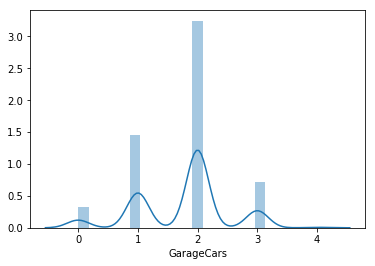

In [708]:
#GarageCars: Size of garage in car capacity

sns.distplot(house['GarageCars'])
plt.show()

# 1 m2 and 3 are most popular

In [709]:

# Creating a dummy variable for the variable 'GarageType' and dropping the first one.
dum22 = pd.get_dummies(house['GarageType'],prefix='GarageType',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum22],axis=1)

# Creating a dummy variable for the variable 'GarageFinish' and dropping the first one.
dum23 = pd.get_dummies(house['GarageFinish'],prefix='GarageFinish',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum23],axis=1)


# Creating a dummy variable for the variable 'GarageQual' and dropping the first one.
dum24 = pd.get_dummies(house['GarageQual'],prefix='GarageQual',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum24],axis=1)

# Creating a dummy variable for the variable 'GarageCond' and dropping the first one.
dum25 = pd.get_dummies(house['GarageCond'],prefix='GarageCond',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum25],axis=1)


# Creating a dummy variable for the variable 'PavedDrive' and dropping the first one.
dum27 = pd.get_dummies(house['PavedDrive'],prefix='PavedDrive',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum27],axis=1)

# Creating a dummy variable for the variable 'SaleType' and dropping the first one.
dum28 = pd.get_dummies(house['SaleType'],prefix='SaleType',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum28],axis=1)

# Creating a dummy variable for the variable 'SaleCondition' and dropping the first one.
dum29 = pd.get_dummies(house['SaleCondition'],prefix='SaleCondition',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum29],axis=1)

# Creating a dummy variable for the variable 'Exterior1st' and dropping the first one.
dum30 = pd.get_dummies(house['Exterior1st'],prefix='Exterior1st',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum30],axis=1)

# Creating a dummy variable for the variable 'Exterior2nd' and dropping the first one.
dum31 = pd.get_dummies(house['Exterior2nd'],prefix='Exterior2nd',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum31],axis=1)


# Creating a dummy variable for the variable 'Exterior2nd' and dropping the first one.
dum32 = pd.get_dummies(house['ExterQual'],prefix='ExterQual',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum32],axis=1)

# Creating a dummy variable for the variable 'ExterCond' and dropping the first one.
dum33 = pd.get_dummies(house['ExterCond'],prefix='ExterCond',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum33],axis=1)

# Creating a dummy variable for the variable 'BsmtQual' and dropping the first one.
dum34 = pd.get_dummies(house['BsmtQual'],prefix='BsmtQual',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum34],axis=1)


# Creating a dummy variable for the variable 'BsmtCond' and dropping the first one.
dum35 = pd.get_dummies(house['BsmtCond'],prefix='BsmtCond',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum35],axis=1)


# Creating a dummy variable for the variable 'BsmtExposure' and dropping the first one.
dum36 = pd.get_dummies(house['BsmtExposure'],prefix='BsmtExposure',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum36],axis=1)

# Creating a dummy variable for the variable 'BsmtFinType1' and dropping the first one.
dum37 = pd.get_dummies(house['BsmtFinType1'],prefix='BsmtFinType1',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum37],axis=1)

# Creating a dummy variable for the variable 'BsmtFinType2' and dropping the first one.
dum38 = pd.get_dummies(house['BsmtFinType2'],prefix='BsmtFinType2',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum38],axis=1)

# Creating a dummy variable for the variable 'GarageYrBlt' and dropping the first one.
dum39 = pd.get_dummies(house['GarageYrBlt'],prefix='GarageYrBlt',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum39],axis=1)


# Creating a dummy variable for the variable 'YearRemodAdd' and dropping the first one.
dum40 = pd.get_dummies(house['YearRemodAdd'],prefix='YearRemodAdd',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum40],axis=1)


# Creating a dummy variable for the variable 'YearRemodAdd' and dropping the first one.
dum41 = pd.get_dummies(house['YearBuilt'],prefix='YearBuilt',drop_first=True)
#Adding the results to the master dataframe
house = pd.concat([house,dum41],axis=1)

In [710]:
#Dropping Columns converted to dummy

house = house.drop(['GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','Exterior1st','Exterior2nd','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageYrBlt','YearRemodAdd','YearBuilt'],axis=1)



In [711]:
house.LotFrontage.isnull().sum()

0

In [712]:
#house['LotFrontage'].isnull() = 0

house['LotFrontage'].loc[house['LotFrontage'].isnull()] = 0

In [713]:
house.LotFrontage.isnull().sum()

0

In [714]:
house.shape

(1460, 252)

In [715]:
round(100*house.isnull().sum()/len(house.index),2)

Id                        0.0
MSSubClass                0.0
LotFrontage               0.0
LotArea                   0.0
Street                    0.0
OverallQual               0.0
OverallCond               0.0
MasVnrArea                0.0
1stFlrSF                  0.0
2ndFlrSF                  0.0
LowQualFinSF              0.0
GrLivArea                 0.0
BsmtFullBath              0.0
BsmtHalfBath              0.0
FullBath                  0.0
HalfBath                  0.0
BedroomAbvGr              0.0
KitchenAbvGr              0.0
TotRmsAbvGrd              0.0
Fireplaces                0.0
GarageCars                0.0
GarageArea                0.0
WoodDeckSF                0.0
OpenPorchSF               0.0
EnclosedPorch             0.0
3SsnPorch                 0.0
ScreenPorch               0.0
PoolArea                  0.0
MiscVal                   0.0
MoSold                    0.0
                         ... 
BsmtExposure_Gd           0.0
BsmtExposure_Mn           0.0
BsmtExposu

In [716]:
# paiwise scatter plot

#plt.figure(figsize=(20, 10))
#sns.pairplot(house)
#plt.show()

In [717]:
# correlation matrix
#cor = house.corr()
#cor

In [718]:
# plotting correlations on a heatmap
# figure size
#plt.figure(figsize=(16,8))

# heatmap
#sns.heatmap(cor, cmap="YlGnBu", annot=True)
#plt.show()

In [719]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 252 entries, Id to YearBuilt_2001-2010
dtypes: float64(2), int64(30), uint8(220)
memory usage: 678.8 KB


In [720]:
X_full = house

In [721]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 252 entries, Id to YearBuilt_2001-2010
dtypes: float64(2), int64(30), uint8(220)
memory usage: 678.8 KB


In [722]:
X = X_full.drop('SalePrice',axis=1)
X.shape

(1460, 251)

In [723]:
X.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,MasVnrArea,1stFlrSF,2ndFlrSF,...,GarageYrBlt_No Garage,YearRemodAdd_1950-1975,YearRemodAdd_1976-1990,YearRemodAdd_1991-2000,YearRemodAdd_2001-2010,YearBuilt_1925-1950,YearBuilt_1950-1975,YearBuilt_1976-1990,YearBuilt_1991-2000,YearBuilt_2001-2010
0,1,60,65.0,8450,1,7,5,196.0,856,854,...,0,0,0,0,1,0,0,0,0,1
1,2,20,80.0,9600,1,6,8,0.0,1262,0,...,0,1,0,0,0,0,1,0,0,0
2,3,60,68.0,11250,1,7,5,162.0,920,866,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,1,7,5,0.0,961,756,...,0,1,0,0,0,0,0,0,0,0
4,5,60,84.0,14260,1,8,5,350.0,1145,1053,...,0,0,0,1,0,0,0,0,1,0


In [724]:
Y = house['SalePrice']

In [725]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'OverallQual',
       'OverallCond', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
       ...
       'GarageYrBlt_No Garage', 'YearRemodAdd_1950-1975',
       'YearRemodAdd_1976-1990', 'YearRemodAdd_1991-2000',
       'YearRemodAdd_2001-2010', 'YearBuilt_1925-1950', 'YearBuilt_1950-1975',
       'YearBuilt_1976-1990', 'YearBuilt_1991-2000', 'YearBuilt_2001-2010'],
      dtype='object', length=251)

In [726]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

##  Model Building and Evaluation

## Ridge Regression

In [727]:
# list of alphas to tune
params = {'alpha': [1, 10 ,20, 50, 75, 90, 100, 125, 150, 300, 400, 500, 750 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1, 10, 20, 50, 75, 90, 100, 125, 150, 300, 400, 500, 750]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [728]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014115,0.004204,0.000403,0.000807,1,{'alpha': 1},-19050.841382,-21279.408146,-20887.370579,-19977.756970,...,-19955.104274,1031.333621,13,-12150.412326,-12002.833693,-12507.943681,-12674.082234,-12435.871621,-12354.228711,243.975290
1,0.008066,0.004033,0.003628,0.004492,10,{'alpha': 10},-19003.354283,-21025.130701,-20693.121376,-18784.309544,...,-19822.378278,894.166823,11,-12800.427266,-12011.774527,-13011.161573,-13243.534585,-13052.934113,-12823.966413,429.817505
2,0.010885,0.003748,0.004028,0.004223,20,{'alpha': 20},-19073.194156,-20892.508273,-20789.024775,-18459.857223,...,-19858.037803,954.497989,12,-13230.912184,-12076.649547,-13386.589491,-13676.960953,-13506.714096,-13175.565254,568.553857
3,0.008474,0.003699,0.002422,0.003913,50,{'alpha': 50},-18639.743796,-20786.499407,-20764.887858,-18071.652894,...,-19673.781387,1118.493709,10,-13824.911790,-12295.536574,-13908.177406,-14282.645183,-14130.797129,-13688.413616,714.961350
4,0.010470,0.001503,0.000000,0.000000,75,{'alpha': 75},-18259.505247,-20769.159995,-20691.201269,-17782.563565,...,-19476.820842,1238.204132,9,-14100.595823,-12455.544979,-14111.837440,-14538.654180,-14389.310293,-13919.188543,750.603333


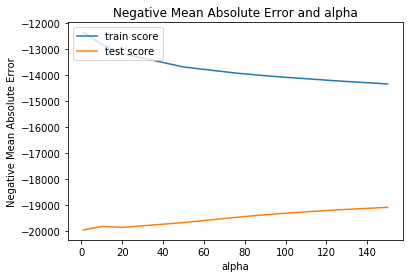

In [729]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [730]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 2.54208245e+02, -2.99717604e+03, -7.99582638e+02,  6.20833749e+03,
        1.73906739e+03,  1.11275758e+04,  4.90437282e+03,  4.01995911e+03,
        1.08687821e+04,  1.47134343e+04, -1.38404150e+03,  2.00907100e+04,
        3.62054011e+03,  7.37612949e+02,  2.43259124e+03, -3.19923186e+02,
       -1.14955457e+03, -3.00383576e+03, -6.68936166e+02,  8.92042906e+02,
        6.82295223e+03,  3.12938125e+02,  1.25350057e+03,  1.12268133e+03,
        3.66686248e+01,  9.48822024e+02,  1.21499720e+03,  2.45322165e+03,
        2.28422306e+02, -2.75491232e+02, -9.34223298e+02,  3.42141352e+03,
        1.60448765e+03,  7.35721160e+03,  5.15567831e+03, -2.95398164e+02,
       -9.94236376e+02,  7.28035821e+02,  1.33309923e+03,  9.45124311e+01,
        2.88685670e+03, -7.50294736e+02,  2.59479806e+03, -1.69548827e+03,
       -2.09478289e+02, -3.32330326e+02,  5.85033890e+02, -1.74005028e+03,
        3.99498159e+02,  7.53242820e+02, -3.27044208e+02, -1.01835578e+02,
        6.67853192e+01,  

In [731]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
ridgecoeff = pd.DataFrame(list(zip(cols, model_parameters)))
#Predictor Variables from the Model built using Ridge Regression:

In [732]:
# Selected features with coeffiecient more than 0


selectedfeat = ridgecoeff

selectedfeat

,0,1
0,constant,180390.738
1,Id,254.208
2,MSSubClass,-2997.176
3,LotFrontage,-799.583
4,LotArea,6208.337
5,Street,1739.067
6,OverallQual,11127.576
7,OverallCond,4904.373
8,MasVnrArea,4019.959
9,1stFlrSF,10868.782


In [733]:
#top impacting features on price
selectedfeat.sort_values(by=1).tail(16)

,0,1
21,GarageCars,6822.952
213,BsmtQual_Ex,6869.793
34,MSZoning_RL,7357.212
251,YearBuilt_2001-2010,7882.919
107,RoofMatl_Roll,8698.278
106,RoofMatl_Metal,9429.212
105,RoofMatl_Membran,10246.087
9,1stFlrSF,10868.782
6,OverallQual,11127.576
10,2ndFlrSF,14713.434


In [734]:
# model with optimal alpha
# Ridge regression
lm2 = Ridge(alpha=alphaselridge)

lm2.fit(X_train, y_train)

from sklearn.metrics import r2_score
# predict
y_train_pred = lm2.predict(X_train)

y_test_pred = lm2.predict(X_test)

#New Code for R2
r_square_score=r2_score(y_test,y_test_pred)
print("R Square score:{}".format(r_square_score))

R Square score:0.858088976038554


In [735]:
len(X_train) # n is equal to total datapoints on which model is built

1021

In [736]:
len(selectedfeat) # k is equal to number of predictor variables in model built

252

In [737]:
#AIC and BIC Calculation
n= len(X_train) # n is equal to total datapoints on which model is built
k= len(selectedfeat) # k is equal to number of predictor variables in model built
resid=np.subtract(y_test_pred,y_test)
rss=np.sum(np.power(resid,2))
print("RSS:{}".format(rss))
aic=n*np.log(rss/n)+2*k
print("AIC:{}".format(aic))
bic=n*np.log(rss/n)+k*np.log(n)
print("BIC:{}".format(bic))

RSS:400006381434.97217
AIC:20705.71889825625
BIC:21947.710428433747


## Lasso Regression

In [738]:
#list of alphas to tune
    
params = {'alpha': [1, 10 ,20, 50, 75, 90, 100, 125, 150, 300, 400, 500, 750]}



# cross validation
folds = 5

In [739]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:   14.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1, 10, 20, 50, 75, 90, 100, 125, 150, 300, 400, 500, 750]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [740]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.443218,0.082857,0.010276,0.020055,1,{'alpha': 1},-19153.561961,-21358.537174,-20998.825528,-20334.445585,...,-20095.474354,1047.178165,13,-12115.406287,-12021.257224,-12482.525608,-12660.105538,-12419.749002,-12339.808732,237.141358
1,0.355820,0.098001,0.003220,0.003944,10,{'alpha': 10},-18896.795298,-21086.102333,-20850.198321,-20110.535096,...,-19864.252715,1063.638862,12,-12127.754761,-11996.124013,-12494.354632,-12668.844868,-12447.316240,-12346.878903,247.605821
2,0.387436,0.070116,0.000406,0.000813,20,{'alpha': 20},-18713.222628,-20940.021567,-20706.799757,-19915.017754,...,-19679.748016,1098.902896,11,-12143.441178,-11990.272052,-12494.747972,-12688.553968,-12484.159180,-12360.234870,254.996640
3,0.293767,0.077211,0.002010,0.004020,50,{'alpha': 50},-18290.462428,-20642.497827,-20410.073097,-19489.748632,...,-19310.686262,1145.975284,10,-12230.661143,-12018.111650,-12552.481389,-12770.047333,-12567.164119,-12427.693127,267.884027
4,0.280584,0.068219,0.006250,0.007655,75,{'alpha': 75},-18018.077897,-20418.791209,-20221.112833,-19273.648940,...,-19071.036255,1181.922926,9,-12340.864304,-12064.636192,-12605.270332,-12873.152114,-12681.750147,-12513.134618,281.908028


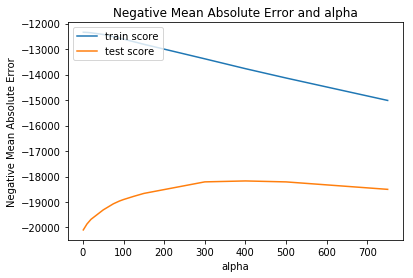

In [741]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [742]:
alphasel = model_cv.best_params_
alphasel = alphasel["alpha"]
alphasel

400

In [743]:
alpha =alphasel

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=400, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [744]:
lasso.coef_

array([-0.00000000e+00, -5.72662260e+03, -0.00000000e+00,  4.17242078e+03,
        9.58808537e+02,  1.33823860e+04,  4.16727447e+03,  3.20717603e+03,
        1.37067955e+02,  0.00000000e+00, -2.21044598e+03,  3.26458983e+04,
        3.87384073e+03,  0.00000000e+00,  2.18002980e+03,  0.00000000e+00,
       -8.36096359e+02, -3.10898090e+03, -0.00000000e+00,  1.21981069e+03,
        6.39690543e+03,  0.00000000e+00,  8.88857220e+02,  3.05426080e+02,
       -2.91416460e+02,  7.39690498e+02,  3.74101631e+02,  4.68872554e+02,
        0.00000000e+00, -0.00000000e+00, -2.84697409e+02,  0.00000000e+00,
        0.00000000e+00,  2.32742774e+03, -0.00000000e+00,  0.00000000e+00,
       -9.23101970e+02,  0.00000000e+00,  1.52098734e+02,  0.00000000e+00,
        1.18697534e+03, -6.08651487e+02,  2.33939386e+03, -1.17879796e+03,
       -0.00000000e+00,  0.00000000e+00,  1.12051111e+02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.25596065e+02,
        4.09731683e+02,  

In [745]:
# lasso model parameters generation
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 1) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lassocoeff = pd.DataFrame(list(zip(cols, model_parameters)))


In [746]:
# Selected features with coeffiecient more than 0


selectedfeat = lassocoeff[lassocoeff.iloc[:,1] != 0.0]
#print(selectedfeat[0].tolist())
selectedfeat

,0,1
0,constant,180367.4
2,MSSubClass,-5726.6
4,LotArea,4172.4
5,Street,958.8
6,OverallQual,13382.4
7,OverallCond,4167.3
8,MasVnrArea,3207.2
9,1stFlrSF,137.1
11,LowQualFinSF,-2210.4
12,GrLivArea,32645.9


In [747]:
#top impacting features on price
selectedfeat.sort_values(by=1).tail(16)

,0,1
69,Neighborhood_Somerst,4714.5
64,Neighborhood_NridgHt,5695.3
107,RoofMatl_Roll,5976.6
21,GarageCars,6396.9
106,RoofMatl_Metal,6410.6
222,BsmtExposure_Gd,6459.1
63,Neighborhood_NoRidge,6559.5
105,RoofMatl_Membran,6674.1
213,BsmtQual_Ex,9140.7
6,OverallQual,13382.4


In [748]:

#top reducing features on price
selectedfeat.sort_values(by=1).head(15)

,0,1
84,Condition2_PosN,-12615.6
135,KitchenQual_Gd,-10339.0
136,KitchenQual_TA,-9333.4
2,MSSubClass,-5726.6
18,KitchenAbvGr,-3109.0
134,KitchenQual_Fa,-2462.5
208,ExterQual_TA,-2376.5
230,BsmtFinType1_Unf,-2317.0
11,LowQualFinSF,-2210.4
55,Neighborhood_Edwards,-2205.4


In [749]:
#List of features as per Lasso Regression
feat = selectedfeat[0].tolist()
feat.remove('constant');
feat

['MSSubClass',
 'LotArea',
 'Street',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 '1stFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'MSZoning_RL',
 'LotShape_IR3',
 'LandContour_HLS',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LandSlope_Mod',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition2_Feedr',
 'Condition2_PosA',
 'Condit

In [750]:
# model with optimal alpha
# lasso regression
lm1 = Lasso(alpha=alphasel)
lm1.fit(X_train, y_train)

from sklearn.metrics import r2_score
# predict
y_train_pred = lm1.predict(X_train)
y_test_pred = lm1.predict(X_test)

#New Code for R2
r_square_score=r2_score(y_test,y_test_pred)
print("R Square score:{}".format(r_square_score))

R Square score:0.841956864316129


In [751]:
len(X_train) # n is equal to total datapoints on which model is built


1021

In [752]:
len(selectedfeat) # k is equal to number of predictor variables in model built

143

In [753]:
#AIC and BIC Calculation
n= len(X_train) # n is equal to total datapoints on which model is built
k= len(selectedfeat) # k is equal to number of predictor variables in model built
resid=np.subtract(y_test_pred,y_test)
rss=np.sum(np.power(resid,2))
print("RSS:{}".format(rss))
aic=n*np.log(rss/n)+2*k
print("AIC:{}".format(aic))
bic=n*np.log(rss/n)+k*np.log(n)
print("BIC:{}".format(bic))

RSS:445478166887.9829
AIC:20597.647657767953
BIC:21302.428565765502
